# Intoduction to Vector Data in Python and QGIS

---

**Objectives:**

By the end of this exercise, you should be able to:
* explain the difference between Points, Lines, and Polygons
* read spatial data using shapefiles, geojsons, and csvs using both Python and QGIS
* subset a spatial dataset in Python and QGIS
* explain the importance of a Coordinate Reference System
* reproject vector data into the Coordinate Reference System of your choice
* plot multiple vector datasets on one map
* clip vector dataset(s) to an area of interest

---

This excercise is an introduction to spatial data and analysis in Python. Spatial data can be any form of data that is associated with a location in the real world. In this excercise, we will use vector data, which is a form of spatial data that consists of points, lines, and polygons. 

<p align="center">
    <img src='imgs/pnt_line_poly.png' width='450' /> 
</p>
<!-- ![pnt_line_poly](./imgs/pnt_line_poly.png) -->

"Vector data are composed of discrete geometric locations (x,y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices, determines the type of vector that we are working with: point, line or polygon" (Stachelek, Wasser, & Jones, 2021).

* A **point** is a single geographic position, such as a train station, and is described by an x,y pair (i.e., a longitude, latitude pair).
* A **line** is a list of geographic positions - or a list of x,y pairs - such as train routes.
* A **polygon** is a list of geographic positions that start and end in the same location. An example would be state or county boundaries.

We will practice reading and visualizing spatial data with Python and QGIS in this excercise.

First, we will need to import the Python packages we are using.

The geopandas package is a geospatial extention of the pandas Python package. We will use it to read, analyze, and visualize spatial data. For more information about the package, check out the Gettting Started page [here](https://geopandas.org/en/stable/getting_started/introduction.html).

In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

### Opening a Shapefile in Python

Next, we will use the geopandas package to read in a shapefile of US state boundaries, as published by the US Census. The dataset we are using, the 2021 TIGER/Line Shapefile of states, can be found [here](https://www2.census.gov/geo/tiger/TIGER2021/STATE/).

A shapefile is a file format that stores geometric location and attribute information of vector data. Shapefiles need supporting files to work, so they are often saved in a folder with all of the required files. The required files have the extentions `.shp`, `.shx`, `.dbf`. The SHP file contains the actual geometry, while the SHX file provides the shape index and the DBF file contains the attribute format and information. Additional supporting files include the PRJ file, which contains projection information (more on that later).

In [2]:
# read in a shapefile

shp = gpd.read_file('./data/tl_2021_us_state/tl_2021_us_state.shp')

shp.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


The `.head()` function allows us to view the first 5 entries in the attribute table. As we can see, there is a lot of information for each feature (i.e., each row). The attribute table consists of features (rows), attributes (columns), an index, and a special geometry attribute. 

<p align="center">
    <img src='imgs/geopandas_df.PNG' width='450' /> 
</p>
<!-- ![](./imgs/geopandas_df.PNG) -->

There are several types of geometries that can be stored in a shapefile. These geometries include `Point`, `LineString` (Line), and `Polygon` as well as `MultiPoint`, `MultiLineString`, and `MultiPolygon`. The latter three are examples of when one feature contains multiple of a geographic shape. For example, the `geometry` for the state of Florida (index 1) is a MultiPolygon because Florida has several islands on its coast, which are polygons within the multi-polygon set that composes Florida.

### A Brief Introduction to Coordinate Reference Systems

In order to represent (i.e., "draw") spatial data from Earth, we need to flatten it from the spherical, 3-dimensional Earth's surface to a 2-dimensional surface. A coordinate reference system (CRS) of a spatial dataset is the information about the mathematical approach used to convert spatial data from 3-D to a 2-D coordinate system grid. There are many different CRS's for different parts of the world and for optimizing accuracy of data in specific dimensions like length and area.

A CRS adapts the Earth's spherical shape (3-D) to a flat surface (2-D) that has an x and y coordinate grid. It helps us take a globe and make it into a map, either on paper or on a computer screen. The elements of the CRS provide the parameters for this "flattening".

<p align="center">
    <img src='imgs/crs.png' width='600' /> 
</p>

<!-- ![crs](./imgs/crs.png) -->

Image from [here](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/). Source:  http://ayresriverblog.com

---
#### The Components of a CRS
The coordinate reference system is made up of several key components:

* **Coordinate system:** The X, Y grid upon which your data is overlayed and how you define where a point is located in space.
* **Horizontal and vertical units:** The units used to define the grid along the x, y (and z) axis.
* **Datum:** A modeled version of the shape of the Earth which defines the origin used to place the coordinate system in space. You will learn this further below.
* **Projection Information:** The mathematical equation used to flatten objects that are on a round surface (e.g. the Earth) so you can view them on a flat surface (e.g. your computer screens or a paper map).

*From Earth Lab's Earth Data Analytics Course found [here](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/). DOI: [here](https://zenodo.org/badge/latestdoi/143348761)*

---

[<img src='imgs/youtube.PNG' width='800' />](https://www.youtube.com/watch?v=KUF_Ckv8HbE&t=1s)

<!-- [![youtube](./imgs/youtube.PNG)](https://www.youtube.com/watch?v=KUF_Ckv8HbE&t=1s) -->

---

## Data must all be in the same CRS for them to line up in visualizations and be accurate in analysis.

---

We can check the CRS of our data by calling the attribute `.crs `. If our data are not all in the same CRS, we will need to convert them all into one CRS using a process called **reprojection**. We will go over how to do a reprojection later in the exercise. 

There are two main types of coordinate systems:
1. **Geographic Coordinate Systems**. These cover the entire globe, for example, latitude and longitude. However, latitude and longitude are not located using a uniform measuring unit, so geographic CRS's are not optimal for measuring distances.
2. **Projected Coordinate Systems**. These are designed for smaller, localized areas to keep distortions to a minimum in that area. A good example are the UTM projection zones.

---
#### Here's an Informative Video on CRS's

[<img src='imgs/youtube_crs.png' width='800' />](https://www.youtube.com/watch?v=xJyJlKbZFlc)

<!-- [![youtube_crs](./imgs/youtube_crs.png)](https://www.youtube.com/watch?v=xJyJlKbZFlc) -->

In [50]:
# what is the crs of our shapefile?
shp.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

To plot our shapefile, we can use the `.plot()` function, which is built-in to the `geopandas` library. This function plots the `geometry` data using the `matplotlib` library

<AxesSubplot:>

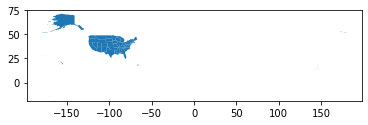

In [3]:
shp.plot()

We have a map! However, it is very hard to see anything on this map because it contains boundaries for all of the US states and territories, including Alaska, Hawaii, the US Virgin Islands, and more.

To get only the lower 48 states, we need to subset the dataset. Subsetting of a geodataframe can be done in the same manor as subsetting a pandas dataframe. Here, we will subset by keeping all features where the attribute `NAME` does not equal (`!=`) a non-lower 48 state name (e.g. "Alaska").

In [4]:
# we want to subset to the Lower 48
lower48 = shp[(shp['NAME'] != 'Alaska') & (shp['NAME'] != 'Hawaii')& (shp['NAME'] != 'American Samoa')& (shp['NAME'] != 'Guam') & (shp['NAME'] != 'Commonwealth of the Northern Mariana Islands') & (shp['NAME'] != 'Puerto Rico')& (shp['NAME'] != 'United States Virgin Islands')]

lower48

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763359,1323686988,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049931578,2391569647,+44.3484222,-114.5588538,"POLYGON ((-111.04547 43.50105, -111.04540 43.4..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190115212,1025971768,+43.6726907,-071.5843145,"POLYGON ((-71.24548 42.74251, -71.24809 42.740..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933327733,13456093195,+35.5397100,-079.1308636,"POLYGON ((-76.91598 36.54388, -76.91620 36.544..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754609,+44.0589536,-072.6710173,"POLYGON ((-72.43462 43.23326, -72.43436 43.232..."


<AxesSubplot:>

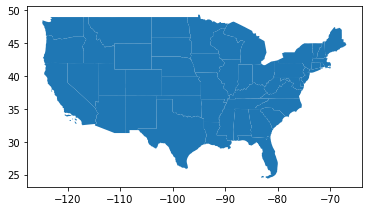

In [5]:
lower48.plot()

Now we can see the lower 48 more clearly. Our variable, `lower48`, is a subset of our original `shp` variable. Our new variable should have 48 features, right? Let's check using the `len()` function.

In [6]:
len(lower48)

49

So it looks like we have 49 features instead of 48. What is the extra feature? Do you notice anything interesting about the index/index values in our new variable?

### Opening a Shapefile in QGIS

First, open a new QGIS project. Then, hover your mouse over the "Layer" > "Add Vector" > "Add Vector Layer..." and click on "Add Vector Layer..."

<p align="center">
    <img src='imgs/QGIS_addVector.png' width='850' /> 
</p>

<!-- ![qgis_addVector](./imgs/QGIS_addVector.png) -->

Next, click on the `...` on the right side of the "Vector Dataset(s)" line in the "Data Source Manager | Vector" window that opened. Navigate to the `tl_2021_us_state` folder in the `data` folder for this exercise. Select the SHP file and click "Open".

<p align="center">
    <img src='imgs/QGIS_addShp.png' width='850' /> 
</p>

<!-- ![qgis_addShp](./imgs/QGIS_addShp.png) -->

Lastly, click "Add" at the bottom of the "Data Source Manager | Vector" window. The QGIS default coordinate reference system (CRS) is EPSG:4326 - WGS 84. Our states shapefile has a CRS of EPSG:4269 - NAD83. When we tried to load in our shapefile, QGIS opens a "Select Transformation" window to convert our states shapefile into the QGIS CRS. Select the first transformation `NAD83 to WGS 84 (1) - EPSG:1188` and click "OK". Close the "Data Source Manager | Vector" window. The shapefile of the US state boundaries should now be loaded in your QGIS project.

We can view the CRS of the data by right clicking on the **tl_2021_us_state** layer in the "Layers" window on the lower left side of the project. Click on the "Properties" option that appears at the bottom. Click on the "Information" option on the top left of the "Layer Properties" window that opens. The CRS information is under the "Information from Provider" heading.

<p align="center">
    <img src='imgs/QGIS_layerProperties.PNG' width='550' /> 
</p>

<!-- ![qgis_layerProperties](./imgs/QGIS_layerProperties.PNG) -->

How does this CRS information compare to what we got from calling the `.crs` attribute in Python?

We can view the attribute table in QGIS, like we were able to in Python.

Right click on the **tl_2021_us_state** layer in the "Layers" window on the lower left side of the project. Click on the "Open Attribute Table" option that appears. 

<p align="center">
    <img src='imgs/QGIS_openAttributeTable.png' width='500' /> 
</p>

<!-- ![qgis_openAttributeTable](./imgs/QGIS_openAttributeTable.png) -->

How does the attribute table shown in QGIS compare with the one we veiwed in Python?

#### Subsetting the Shapefile in QGIS 

Click on the **DIVISION** column label so that the arrow is pointing upward. Then select the rows where the Division value is 0. (You can select by clicking on the row index numbers. To select more than one, you can use Ctrl+Click, Shift+Click, or Click and drag.) If the rows have been selected, they should appear blue rather than gray. Also select the features for Alaska and Hawaii using Ctrl+Click. 

Next, click the icon with the yellow and grey triangle. This icon will invert your selection, so all of the states we are interested in keeping are selected.

<p align="center">
    <img src='imgs/QGIS_invertSelection.png' width='800' /> 
</p>

<!-- ![qgis_invertSelection](./imgs/QGIS_invertSelection.png) -->

Next, minimize the attribute table. Then, right click on the **tl_2021_us_states** layer, hover over "Export" and click "Save Selected Features As...".

<p align="center">
    <img src='imgs/QGIS_exportSelected.png' width='550' /> 
</p>

<!-- ![qgis_saveSelected](./imgs/QGIS_exportSelected.png) -->

A "Save Vector Layer as..." window will open. Select the **ESRI Shapefile** format and the click on the `...` for File Name. Navigate to the "data" folder for this exercise and create a new folder called **tl_2021_us_state_lower48**. Then type the same name (tl_2021_us_state_lower48) in the "File Name:" line and click "Save". In the "Save Vector Layer as..." window, click "OK".

A new layer should open in the "Layers" window labeled **tl_2021_us_state_lower48**. If you open up the new folder you created, you should see the SHP file and the other associated files that have been created.

Uncheck the **tl_2021_us_state** layer. Everything but the contiguous US (from your newly created layer) should disappear. Right click on **tl_2021_us_state_lower48** and open the attribute table. 

How many features are there? Is this the same as what we got when subsetting with Python?

### Reading a GeoJSON in Python

Next, we will use the `geopandas` library to read in a geojson file of Amtrak routes. (The Amtrak route data is provided by the Bureau of Transportation Statistics and is available [here](https://data-usdot.opendata.arcgis.com/search?tags=Rail).)

What type of vector data do you expect the Amtrak routes to be?

A GeoJOSN is another way to format and save geographic data. It is similarly structured to a JSON file, but supports `Point`, `LineString`, `Polygon`, `MultiPoint`, `MultiLineString`, and `MultiPolygon` geometries. Attributes are called `properties` and they provide information about the Feature object. There can also be sets of Features, called a FeatureCollection. For example, one Amtrak route would be a feature, but all routes in a region could be a FeatureCollection.

We can read in a geojson in pretty much the same way as we read in the shapefile. The `.tail()`  function will show us the last 5 features in the attribute table.

In [7]:
gjson = gpd.read_file('./data/Amtrak_Routes.geojson')

gjson.tail()

,OBJECTID,NAME,Shape_Leng,Shape_Le_1,ShapeSTLength,geometry
42,43,Wolverines (Michigan_Services),264891.429655,264891.429655,3.567930e+05,"MULTILINESTRING ((-86.71254 41.80285, -86.7126..."
43,44,Capitol Corridor,274000.442673,274000.442673,3.483797e+05,"MULTILINESTRING ((-121.91428 37.34222, -121.91..."
44,45,Vermonter,978619.546954,978619.546954,1.310995e+06,"MULTILINESTRING ((-77.01421 38.88360, -77.0137..."
45,46,Carolinian,0.000000,871554.626039,1.109557e+06,"MULTILINESTRING ((-78.25935 35.54109, -78.2565..."
46,47,Piedmont,0.000000,288265.146571,3.564794e+05,"MULTILINESTRING ((-80.82749 35.23795, -80.8273..."


<AxesSubplot:>

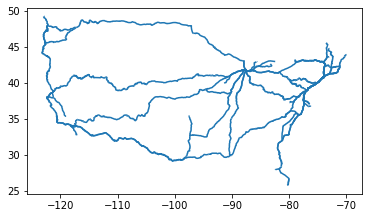

In [8]:
gjson.plot()

Geometry data has certain general attributes (Python attributes - these are different from columns in the attribute table). These include `area`, `bounds`, `length`, and `geom_type` among others.

If you want to check the geometry data type, area, bounds, length, etc., you can call the attribute on the specified Feature's geometry.

In [26]:
# this is how to check the geometry type
# we first declare that we are looking at the 'geometry' column
# and then specify we want to look at row 0 (this first row)
# finally, we reference the attribute using dot-notation
gjson['geometry'][0].geom_type

'MultiLineString'

How does the CRS compare with the state shapefile CRS?

In [32]:
gjson.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Reading GeoJSON files with QGIS

Reading a GeoJSON file into QGIS is very similar to reading a shapefile into QGIS. In your QGIS project, again hover your mouse over the "Layer" > "Add Vector" > "Add Vector Layer..." and click on "Add Vector Layer...". When the "Data Source Manager | Vector" window opens, click on the `...` to the right of the "Vector Dataset(s)" line and navigate to the `data` folder for this exercise. Select the `Amtrak_Routes.geojson` file and click "Open". Finally, click "Add" at the bottom of the "Data Source Manager | Vector" window.

Right click on the **Amtrak_Routes** layer in your "Layers" window, then click "Zoom to Layer(s)". If you only see our previous map of the US states, lookat your "Layers" window. Click and drag the **Amtrak_Routes** layer to the top. The routes should be overlapping the states.

<p align="center">
    <img src='imgs/QGIS_amtrakRoutes.PNG' width='850' /> 
</p>

<!-- ![qgis_amtrakRoutes](./imgs/QGIS_amtrakRoutes.PNG) -->

Open the attribute table and check the CRS of the **Amtrak_Routes** layer. How do they compare to what we saw in Python? How does the CRS compare to the **tl_2021_us_state_lower48** CRS?

### Reading CSV Files with Python and Converting to Spatial Data

Now, we will read in point data from a CSV file. A CSV is a file that stores information separated by commas (<u>c</u>omma <u>s</u>eparated <u>v</u>alues). They can be opened in Microsoft Excel or in text documents.

<p align="center">
    <img src='imgs/excel_preview.PNG' width='1050' /> 
</p>

<!-- ![excel_preview](./imgs/excel_preview.PNG) -->

To read them into Python, we will use the `pandas` package. `pandas` and `geopandas` are very similar, as `geopandas` is a spatial extention of `pandas`. As such, `pandas` DataFrames have similar attributes to `geopandas` GeoDataFrames. We can again use `.head()` or `.tail()` to view the frist 5 or last 5 rows of features, respectively.

In [29]:
csv_df = pd.read_csv('./data/Amtrak_Stations.csv')

csv_df.head()

,X,Y,OBJECTID_1,OBJECTID,StaType,StnType,ZipCode,State,City,Address2,Address1,Name,Code,StationNam
0,-9.422620e+06,5.371788e+06,1,1,Station Building (with waiting room),BUS,48801,MI,Alma,Transportation Center,1105 Willow Run Drive,,AAM,"Alma, MI"
1,-8.216401e+06,5.273163e+06,2,2,Curbside Bus Stop only (no shelter),BUS,12211,NY,Albany,,737 Albany Shaker Road,Albany Intl Airport,ABA,"Albany, NY"
2,-1.005378e+07,5.610282e+06,3,3,Curbside Bus Stop only (no shelter),BUS,54421,WI,Colby,,1210 North Division St.,,ABB,"Abbotsford-Colby, WI"
3,-8.478456e+06,4.794767e+06,4,4,Station Building (with waiting room),TRAIN,21001,MD,Aberdeen,,18 East Bel Air Avenue,,ABE,"Aberdeen, MD"
4,-1.187200e+07,4.175039e+06,5,6,Station Building (with waiting room),TRAIN,87102,NM,Albuquerque,,320 1st Street SW,,ABQ,"Albuquerque, NM"


We can see that these data have different types of Amtrak Stations. For this exercise, we are only interested in the **train** stations. Let's see how many total stations there are versus how many train stations.

In [37]:
# get the length of total Amtrak stations and the number of all Amtrak train stations

print('Total number of Amtrak Stations: {0}'.format(len(csv_df)))
print('Total number of Amtrak Train Stations: {0}'.format(len(csv_df[csv_df['StnType'] == 'TRAIN'])))

Total number of Amtrak Stations: 1088
Total number of Amtrak Train Stations: 540


It looks like about half of our total stations are train stations. Let's plot the total stations and the train stations. 

Because we are currently using a `pandas` DataFrame, we cannot use the `geopandas` `.plot()` function.

Instead, we will use the `matplotlib` package to plot a scatterplot of points based on the `X` and `Y` values in out DataFrame. `matplotlib` is a very useful package with which we can create all kinds of plots and visualizations. (Fun Fact: It is designed to be as usebale as MATLAB, and the `pyplot` module provides a MATLAB-like interface, which is where it gets its name.)

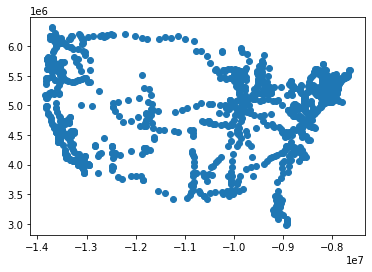

In [31]:
# plot all Amtrak Stations

plt.scatter(csv_df['X'], csv_df['Y'])

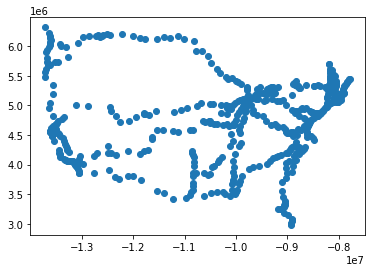

In [39]:
# plot Amtrak Train Stations
stations_df = csv_df[csv_df['StnType'] == 'TRAIN']

plt.scatter(stations_df['X'], stations_df['Y'])

Now, let's convert the train-stations-only DataFrame into a GeoDataFrame! To do this, we will need to create a `geometry` column that is populated by the `POINT` data type. In order to create these data, we need to import the `Point` function from the `geometry` module in the `shapely` library.

c:\Users\mdgai\anaconda3\envs\dswe\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\mdgai\AppData\Local\Temp/ipykernel_39432/3549342513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_df['geometry'] = stations_df.apply(lambda row: Point(np.array(row['X']), np.array(row['Y'])), axis=1) # X is longitude, Y is latitude


<AxesSubplot:>

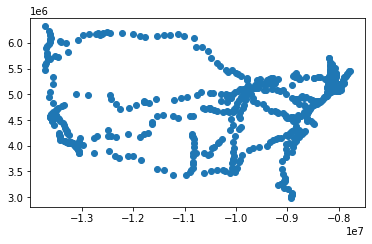

In [52]:
# make a geometry column
# we will use the spatial data type POINT
from shapely.geometry import Point
import numpy as np

stations_df['geometry'] = stations_df.apply(lambda row: Point(row['X'], row['Y']), axis=1) # X is longitude, Y is latitude

# convert our DataFrame to a GeoDataFrame
stations_gdf = gpd.GeoDataFrame(stations_df, geometry='geometry', crs='EPSG:3857')
# EPSG:3857 is a projected coordinate system used for rendering maps in ESRI, ArcGIS 
# (from which we downloaded the data) Google Maps, OpenStreetMap, etc.

stations_gdf.plot()

Now that we are using a GeoDataFrame, we can use the `.plot()` function and call spatial attributes like `.crs` and `.geom_type`.

How does the CRS compare with our other two datasets?

In [41]:
stations_gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Reading CSV Files with QGIS and Converting to Spatial Data

To read in a CSV to QGIS, hover over "Layer" > "Add Layer" > "Add Delimited Text Layer..." and click on the latter. 

<p align="center">
    <img src='imgs/QGIS_addCSV.png' width='850' /> 
</p>

<!-- ![qgis_addCSV](./imgs/QGIS_addCSV.png) -->

Click on the `...` to the right of "File Name". Navigate to the `data` folder for this exercise and click on the `Amtrak_Stations` CSV file. Click "Open".

Because we know our CSV has X and Y spatial data, select the "Point coordinates" option under the "Geometry Definition" header. Make sure the X field and Y field match X and Y.

<p align="center">
    <img src='imgs/QGIS_pointCoords.PNG' width='550' /> 
</p>

<!-- ![qgis_pointCoords](./imgs/QGIS_pointCoords.PNG) -->

We then need to select the correct CRS. Looking at our CRS from Python, we know the EPSG is 3857. Click on the projection/globe icon to the right of the "Geometry CRS" line.

In the "Coordinate Reference System Selector" window that opens, type the EPSG code into the "Filter" line at the top. Select the CRS with `EPSG:3857` and click "OK".

<p align="center">
    <img src='imgs/QGIS_crs.PNG' width='450' /> 
</p>

<!-- ![qgis_crs](./imgs/QGIS_crs.PNG) -->

Click "Add" at the bottom of the "Data Source Manager | Delimited Text" window. Once again, we are prompted to select a transformation. Remember that when data are in different CRS, they cannot be accurately represented relative to each other. Select the first transformation option and click "OK". Then close the "Data Source Manager | Delimited Text" window. 

Hooray! We now have all 3 datasets in one QGIS project.

<p align="center">
    <img src='imgs/QGIS_allLayers.PNG' width='850' /> 
</p>

<!-- ![qgis_allLayers](./imgs/QGIS_allLayers.PNG) -->

Next, let's subset our points to just the train stations like we did in Python.

Open the **Amtrak_Stations** attribute table. Because we know there are so many non-Train stations, we will use the "Select features using an expression" tool. To access this, click the icon with the $\varepsilon$ and the yellow square (fifth from the left).

<p align="center">
    <img src='imgs/QGIS_selectExpression.PNG' width='850' /> 
</p>

<!-- ![qgis_selectExpression](./imgs/QGIS_selectExpression.PNG) -->

In the open space in the "Expression" tab in the window that opens, type `StnType = 'TRAIN'` and click "Select Features". Then click "Close".

<p align="center">
    <img src='imgs/QGIS_expression.PNG' width='550' /> 
</p>

<!-- ![qgis_expression](./imgs/QGIS_expression.PNG) -->

Your QGIS project should now have all of the Train Stations highlighted in yellow.

<p align="center">
    <img src='imgs/QGIS_selected.PNG' width='750' /> 
</p>

<!-- ![qgis_selected](./imgs/QGIS_selected.png) -->

Now, save the selected features in a folder labeled `Amtrak_Stations_Trains` as a Shapefile of the same name. (HINT: Look back at how we did this with the states.)

### Plotting and Process Multiple Datasets Together in Python

In order to visualize, process, or analyze multiple spatial datasets, we need to ensure they are all in the same projection. In this case, the data we are using - the contiguous US, Amtrak routes, and Amtrak train stations - do not have the same CRS's.

In [82]:
print('lower48 CRS: {0}'.format(lower48.crs))
print('Amtrak_Routes (gjson) CRS: {0}'.format(gjson.crs))
print('Amtrak Train Stations (stations_gdf) CRS: {0}'.format(stations_gdf.crs))

lower48 CRS: epsg:4269
Amtrak_Routes (gjson) CRS: epsg:4326
Amtrak Train Stations (stations_gdf) CRS: EPSG:3857


We will use the `lower48` CRS as our unifiying coordinate reference system. It is the NAD83 CRS (see the second video above) and is specifically designed for use in North America.

In order to get the data into the same projection, we will use the `.to_crs()` function from the `geojson` library. While we can see from the cell above that the EPSG code for the lower48 dataset is 4269, we can use the `.to_epsg()` funciton of the `.crs` attribute to communicate with the `.to_crs()` function. We will specify the GeoDataFrame we want to reproject and then call the `.to_crs()` funtion, using the EPSG code from the lower48 dataset.

In [79]:
# get the EPSG code for the lower48 dataset
lower48_epsg = lower48.crs.to_epsg()
# print the variable
print(lower48_epsg)

# reproject the amtrak routes to the lower 48 CRS
routes_nad83 = gjson.to_crs(lower48_epsg)
# output the CRS of the new, reprojected GeoDataFrame
routes_nad83.crs

4269


<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [80]:
# Repeat these steps for the amtrak train stations

# reproject the amtrak train station to the lower 48 CRS
stations_nad83 = stations_gdf.to_crs(lower48_epsg)
# output the CRS of the new, reprojected GeoDataFrame
stations_nad83.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [81]:
# let's repeat our print statements from earlier, to double check our CRS's in one place
print('lower48 CRS: {0}'.format(lower48.crs))
print('reprojected Amtrak routes (routes_nad83) CRS: {0}'.format(routes_nad83.crs))
print('reprojected Amtrak train stations (stations_nad83) CRS: {0}'.format(stations_nad83.crs))

lower48 CRS: epsg:4269
reprojected Amtrak routes (routes_nad83) CRS: epsg:4269
reprojected Amtrak train stations (stations_nad83) CRS: epsg:4269


Great! Now all of these data are in the same projection, let's plot them together. We will do this using the `pyplot` module (which we've imported as `plt`) from `matplotlib`.

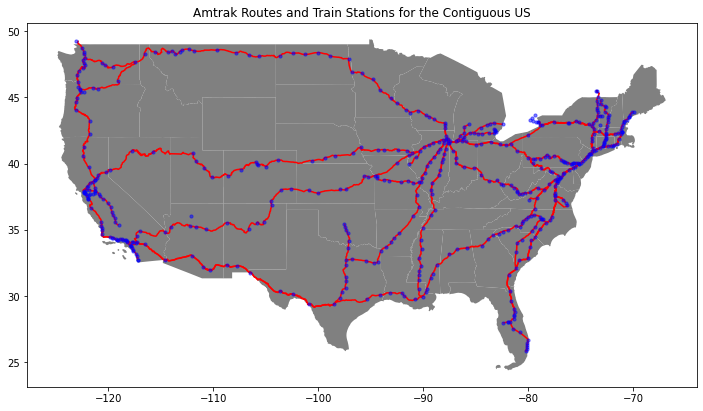

In [96]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add states to the plot
lower48.plot(color='Grey', ax=ax, zorder=1)

# add the reprojected Amtrak Routes to the plot
routes_nad83.plot(ax=ax, markersize=6, color='r', zorder=2)

# add the reprojected Amtrak train stations to the plot
stations_nad83.plot(ax=ax, markersize=10, color='b', alpha=0.5, zorder=3)

# add a title for the plot
ax.set_title("Amtrak Routes and Train Stations for the Contiguous US");

We can also add more distinct boundaries for the states and add a legend.

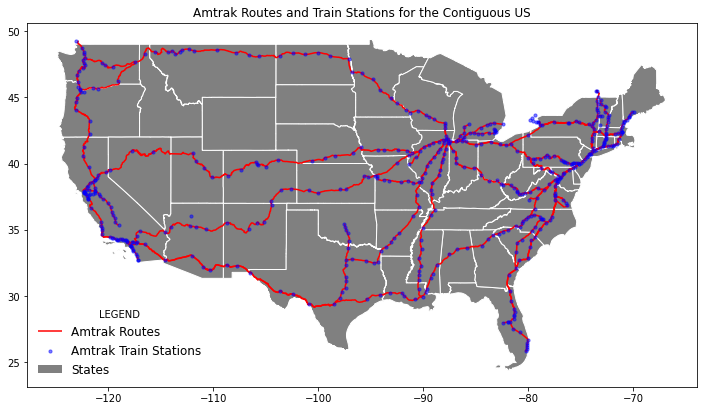

In [148]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add states to the plot
lower48.plot(facecolor='Grey', edgecolor='white', ax=ax, zorder=1)

# another way to make more distinct boundaries is to add boundaries
# lower48.boundary.plot(color='white', ax=ax, zorder=2)

# add the reprojected Amtrak Routes to the plot
routes_nad83.plot(ax=ax, markersize=6, color='r', label = 'Amtrak Routes', zorder=3)

# add the reprojected Amtrak train stations to the plot
stations_nad83.plot(ax=ax, markersize=10, color='b', alpha = 0.5, label = 'Amtrak Train Stations', zorder=4)

# add a title for the plot
ax.set_title("Amtrak Routes and Train Stations for the Contiguous US")

# Adding the states legend entried adds a layer of complexity
# without the states legend entry, use this code:
# # add a legend
# ax.legend(fontsize=12,
#           frameon=False,
#           loc=('lower left'),
#           title="LEGEND")

# otherwise do this:
# create legend, by first getting the already present handles, labels
handles, labels = fig.gca().get_legend_handles_labels()

from matplotlib.patches import Polygon

p= Polygon(np.random.rand(3, 2), True, facecolor="Grey", 
                   edgecolor='none', zorder=1)
# and then add the states entry
handles.append(p)  
labels.append('States')                     

# add a legend
ax.legend(handles=handles, labels=labels,
          fontsize=12,
          frameon=False,
          loc=('lower left'),
          title="LEGEND")

In addition to visualizations, reprojection allows us to accurately run analyses and cross-dataset processing. For example, we can look specifically at the Amtrak routes and train stations in North Carolina if we subset the `lower48` dataset to only North Carolina and then use this GeoDataFrame to clip our other datasets using the `.clip()` function from `geopandas`.

The `.clip()` function takes three arguments. The first is the vector layer to be clipped (our routes and stations). The second is the mask (vector layer) to be used to clip the first vector layer (our North Carolina border). The third is an optional **True/False** input that if set to **True** will only return the original geometry type in the case where the clipping process yields multiple or different geometry types. We will use the default of **False** for this exercise.

<AxesSubplot:>

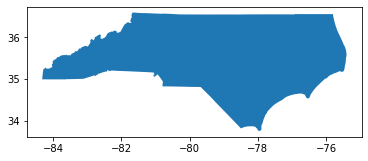

In [5]:
# first, subset to North Carolina
nc = lower48[lower48['NAME']=='North Carolina']
nc.plot()

<AxesSubplot:>

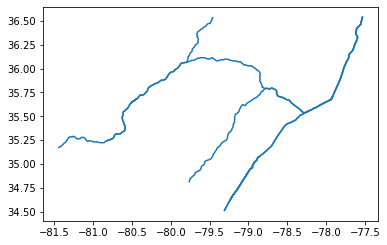

In [157]:
# now, clip the routes and plot them
# make sure to clip the routes geodataframe with the correct CRS! 
nc_routes = gpd.clip(routes_nad83, nc)
nc_routes.plot()

<AxesSubplot:>

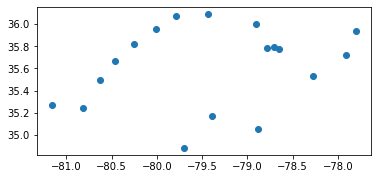

In [154]:
# clip the train stations (with the correct CRS) and plot them
nc_stations = gpd.clip(stations_nad83, nc)
nc_stations.plot()

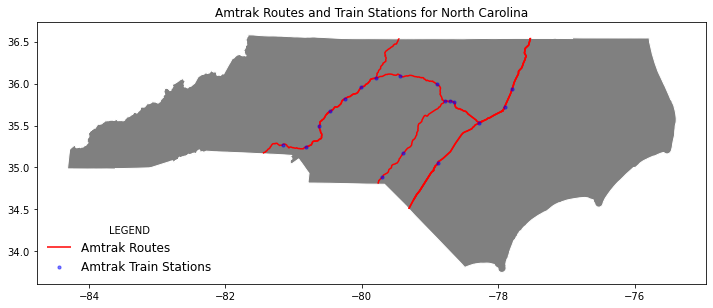

In [156]:
# Now plot them all together

# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add states to the plot
nc.plot(facecolor='Grey', edgecolor='white', ax=ax, zorder=1)

# add the reprojected Amtrak Routes to the plot
nc_routes.plot(ax=ax, markersize=6, color='r', label = 'Amtrak Routes', zorder=3)

# add the reprojected Amtrak train stations to the plot
nc_stations.plot(ax=ax, markersize=10, color='b', alpha = 0.5, label = 'Amtrak Train Stations', zorder=4)

# add a title for the plot
ax.set_title("Amtrak Routes and Train Stations for North Carolina")

# Adding the states legend entried adds a layer of complexity
# without the states legend entry, use this code:
# add a legend
ax.legend(fontsize=12,
          frameon=False,
          loc=('lower left'),
          title="LEGEND")

Congrats, you've made it to the end of Exercise 1! 

Now you get to try it on your own. Your goal is to create a map of North Carolina that shows county boundaries, major rivers, and colleges and universities. **Please include all the code you use below.**

Your final map should look like this:

<p align="center">
    <img src='imgs/HW_map.png' width='1000' /> 
</p>

<!-- ![](./imgs/HW_map.png) -->

*potential bonuses:* 

* 1 point: Change county colors based on land area and/or change point colors based on school type
* 3 points: Create a map of Wake county with the major rivers and the colleges and universities.
* 5 points: *big bonus* figure out which county has the most colleges/unis (zonal stat)

First, you will need to download your data.

Follow [this link](https://www2.census.gov/geo/tiger/TIGER2021/) to the Census Bureau's TIGER/Line Shapefiles FTP Archive. Find the county zipfile and download it.

Follow [this link](https://data-ncdenr.opendata.arcgis.com/datasets/majorhydro/explore?location=35.192251%2C-79.900150%2C7.47) to the North Carolina Department of Environmental Quality's major rivers spatial dataset stored with ArcGIS Online. Download this dataset.

Follow [this link](https://www.nconemap.gov/datasets/colleges-and-universities/explore?location=35.091428%2C-80.116650%2C7.68) to the NC One map of all colleges and universities in North Carolina. Download this dataset.

A few questions to answer. (1 bonus point per fully correct question)

* what file type did you download for each dataset?
* what are the geographic data types for each dataset?
* what is the CRS for each dataset?
* what CRS are you using for your map?